In [6]:
x = [66, 71, 87, 88, 83, 89, 81, 93, 76, 79, 89, 91]
y = [64, 73, 76, 84, 93, 80, 88, 94, 73, 75, 76, 91]
print("相関係数(numpyで計算):", round(np.corrcoef(x, y)[0,1], 3))


相関係数(numpyで計算): 0.711


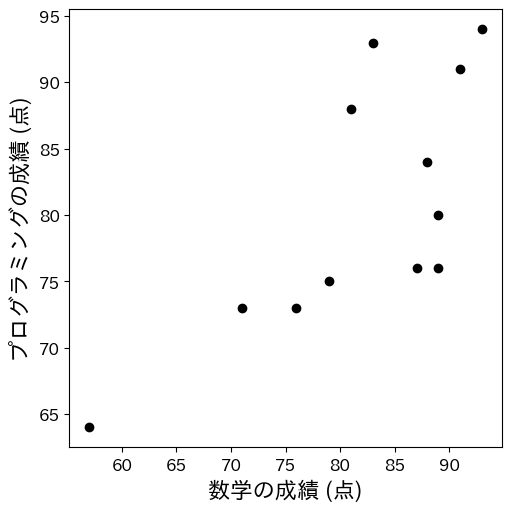

In [5]:
x = [57, 71, 87, 88, 83, 89, 81, 93, 76, 79, 89, 91]
y = [64, 73, 76, 84, 93, 80, 88, 94, 73, 75, 76, 91]
plt.figure(figsize=(5, 5), layout='constrained')
plt.scatter(x, y, color='k')
plt.xlabel('数学の成績 (点)', fontsize=16)
plt.ylabel('プログラミングの成績 (点)', fontsize=16)
plt.tick_params(labelsize=12)

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
%matplotlib inline

In [ ]:
x = np.random.normal(0, 1, 100)
y = x + np.random.normal(0, 1, 100) * 0.3
plt.figure(figsize=(5, 5))
plt.scatter(x, y, c="black")
plt.ylim(-2, 2)
plt.xlim(-2, 2)
plt.xlabel("$x$", fontsize=20, labelpad=8, math_fontfamily='cm')
plt.ylabel("$y$", fontsize=20, labelpad=8, math_fontfamily='cm')
plt.tick_params(labelsize=16)
plt.tight_layout()
plt.show()

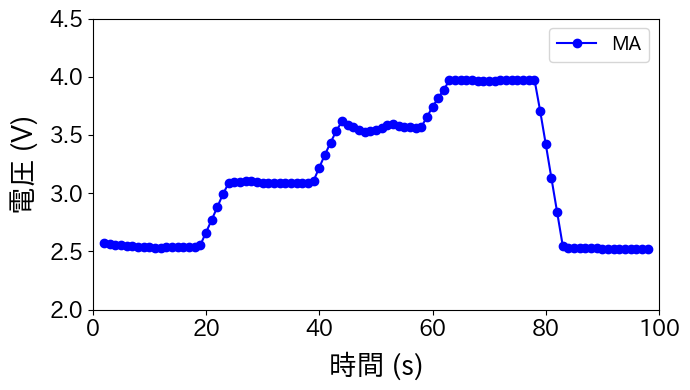

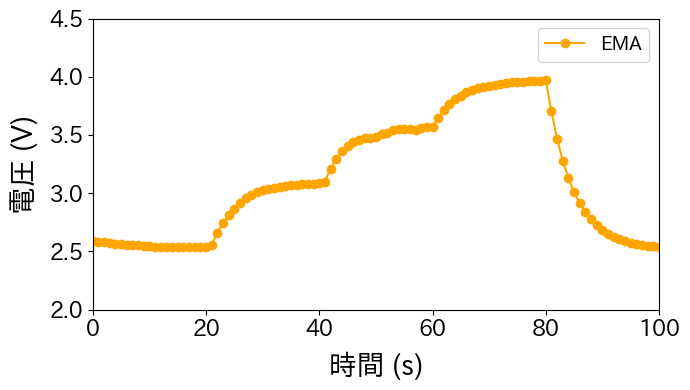

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ---- CSV読み込み ----
df = pd.read_csv("result_C2.csv", parse_dates=True)
y = df.values.ravel()
t = np.arange(len(y))

# ---- MA (移動平均) ----
window_size = 5  # 平滑化幅
y_ma = pd.Series(y).rolling(window=window_size, center=True).mean().values

plt.figure(figsize=(7,4))
plt.plot(t, y_ma, color="blue", linestyle="-", marker="o", markersize=6, label="MA")
plt.ylim(2.0, 4.5)
plt.xlim(t[0], t[-1])
plt.xlabel("時間 (s)", fontsize=20, labelpad=8)
plt.ylabel("電圧 (V)", fontsize=20, labelpad=8)
plt.tick_params(labelsize=16)
plt.legend(loc="upper right", fontsize=14)
plt.tight_layout()
plt.savefig("result_C2_MA.png")  # MA用のファイル名で保存
plt.show()

# ---- EMA (指数移動平均) ----
alpha = 0.2  # 平滑化係数
y_ema = pd.Series(y).ewm(alpha=alpha).mean().values

plt.figure(figsize=(7,4))
plt.plot(t, y_ema, color="orange", linestyle="-", marker="o", markersize=6, label="EMA")
plt.ylim(2.0, 4.5)
plt.xlim(t[0], t[-1])
plt.xlabel("時間 (s)", fontsize=20, labelpad=8)
plt.ylabel("電圧 (V)", fontsize=20, labelpad=8)
plt.tick_params(labelsize=16)
plt.legend(loc="upper right", fontsize=14)
plt.tight_layout()
plt.savefig("result_C2_EMA.png")  # EMA用のファイル名で保存
plt.show()

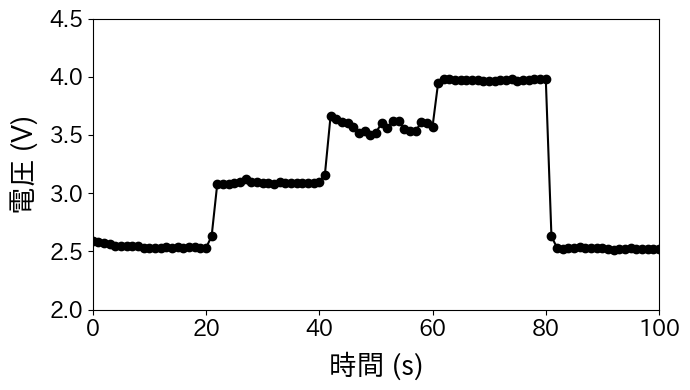

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# CSV読み込み
df = pd.read_csv("result_C2.csv", parse_dates=True)
y = df.iloc[:,0].values  # 1列目を使用
t = np.arange(len(y))

# グラフ描画
plt.figure(figsize=(7,4))
plt.plot(t, y, color="black", linestyle="-", marker="o", markersize=6)
plt.ylim(2.0, 4.5)
plt.xlim(t[0], t[-1])
plt.xlabel("時間 (s)", fontsize=20, labelpad=8)
plt.ylabel("電圧 (V)", fontsize=20, labelpad=8)
plt.tick_params(labelsize=16)
plt.tight_layout()
plt.savefig("result_C2.png")
plt.show()

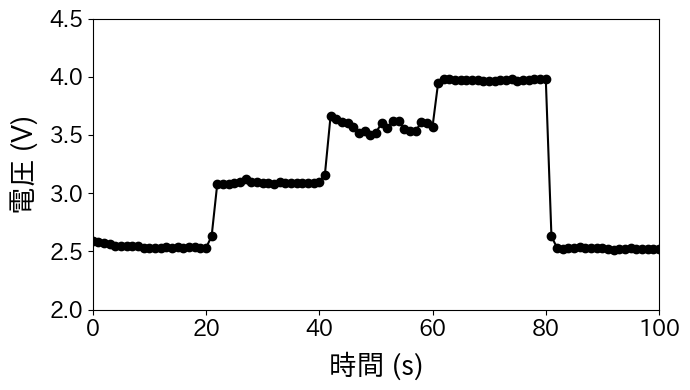

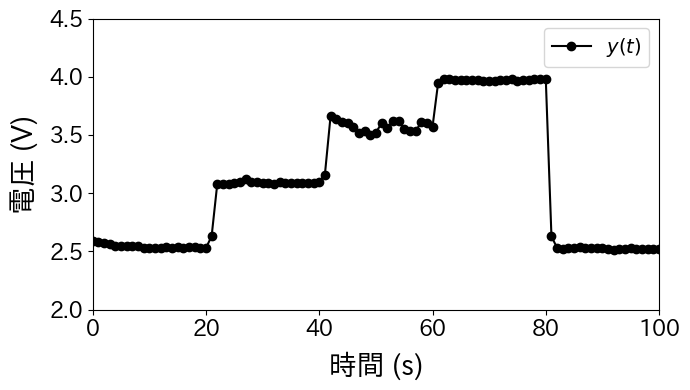

In [22]:
df = pd.read_csv("result_C2.csv", parse_dates=True)
y = df.values.ravel()
t = np.arange(len(y))

plt.figure(figsize=(7,4))
plt.plot(t, y, color="black", linestyle="-", marker="o", markersize=6)
plt.ylim(2.0,4.5)
plt.xlim(t[0], t[-1])
plt.xlabel("時間 (s)", fontsize=20, labelpad=8)
plt.ylabel("電圧 (V)", fontsize=20, labelpad=8)
plt.tick_params(labelsize=16)

plt.tight_layout()
plt.savefig("result_C2.png")

plt.figure(figsize=(7,4))
plt.plot(t, y, color="black", linestyle="-", marker="o", markersize=6,label="$y(t)$")
plt.legend(loc="upper right",fontsize=14)
plt.ylim(2.0,4.5)
plt.xlim(0,100)
plt.xlabel("時間 (s)", fontsize=20, labelpad=8)
plt.ylabel("電圧 (V)", fontsize=20, labelpad=8)
plt.tick_params(labelsize=16)
plt.tight_layout()
plt.savefig("result_C2.png")

In [ ]:
data = pd.read_csv("result_C2.csv", parse_dates=True)
plt.figure(figsize=(7, 4))

plt.tight_layout()
plt.savefig("result_C2.png")

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ---- CSVデータの読み込み ----
df = pd.read_csv("result_C2.csv")

# 列名が1列だけの場合は自動で使用
if df.shape[1] == 1:
    y = df.iloc[:, 0].values
else:
    # 2列以上の場合は2列目を使用（電圧値など）
    y = df.iloc[:, 1].values

t = np.arange(len(y))

# ---- 平滑化 ----
window_size = 5  # 移動平均(MA)の窓幅
span = 5         # 指数移動平均(EMA)のスパン

y_ma = pd.Series(y).rolling(window=window_size).mean()
y_ema = pd.Series(y).ewm(span=span, adjust=False).mean()

# ======================================================
# ① 移動平均（MA）のグラフを作成・保存
# ======================================================
plt.figure(figsize=(8, 4))
plt.plot(t, y, color="gray", linestyle="--", label="元データ")
plt.plot(t, y_ma, color="orange", linewidth=2, label=f"移動平均 (MA, window={window_size})")
plt.xlabel("時間 (s)", fontsize=14, labelpad=8)
plt.ylabel("電圧 (V)", fontsize=14, labelpad=8)
plt.title("移動平均（MA）による平滑化", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig("result_C2_MA.png")  # ← MA版を保存
plt.close()

# ======================================================
# ② 指数移動平均（EMA）のグラフを作成・保存
# ======================================================
plt.figure(figsize=(8, 4))
plt.plot(t, y, color="gray", linestyle="--", label="元データ")
plt.plot(t, y_ema, color="blue", linewidth=2, label=f"指数移動平均 (EMA, span={span})")
plt.xlabel("時間 (s)", fontsize=14, labelpad=8)
plt.ylabel("電圧 (V)", fontsize=14, labelpad=8)
plt.title("指数移動平均（EMA）による平滑化", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig("result_C2_EMA.png")  # ← EMA版を保存
plt.close()

print("✅ 平滑化済みグラフを2枚保存しました：")
print("   - result_C2_MA.png")
print("   - result_C2_EMA.png")

✅ 平滑化済みグラフを2枚保存しました：
   - result_C2_MA.png
   - result_C2_EMA.png


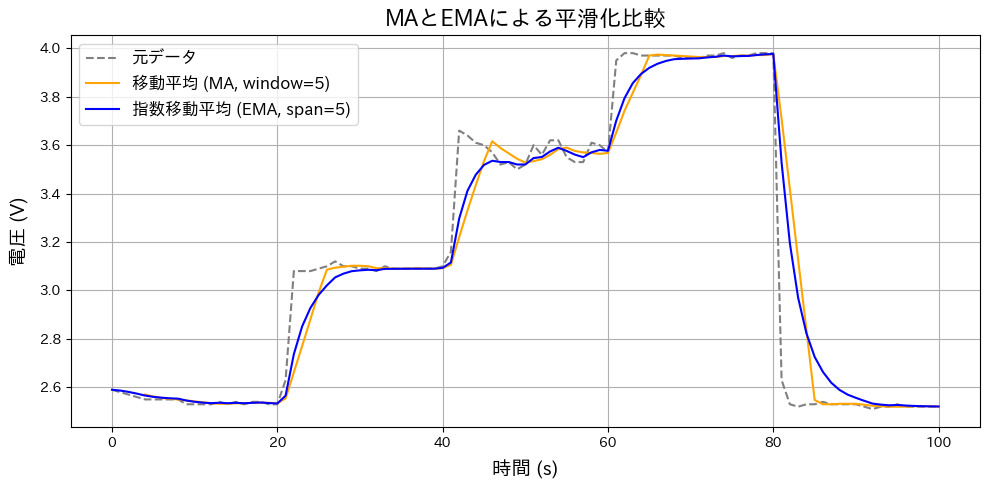

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ---- CSVデータの読み込み ----
# CSVに列名が無い場合は header=None とする
df = pd.read_csv("result_C2.csv")

# 列名が1列だけの場合、自動的にその列を使用
if df.shape[1] == 1:
    y = df.iloc[:, 0].values
else:
    # 2列以上ある場合、電圧データが入っている列を指定
    # 例: df["Voltage"].values など
    y = df.iloc[:, 1].values

t = np.arange(len(y))

# ---- 平滑化（MAとEMA）----
window_size = 5  # 移動平均の窓幅
span = 5         # EMAのスパン

y_ma = pd.Series(y).rolling(window=window_size).mean()
y_ema = pd.Series(y).ewm(span=span, adjust=False).mean()

# ---- グラフ描画 ----
plt.figure(figsize=(10, 5))
plt.plot(t, y, color="gray", linestyle="--", label="元データ")
plt.plot(t, y_ma, color="orange", label=f"移動平均 (MA, window={window_size})")
plt.plot(t, y_ema, color="blue", label=f"指数移動平均 (EMA, span={span})")

plt.xlabel("時間 (s)", fontsize=14, labelpad=8)
plt.ylabel("電圧 (V)", fontsize=14, labelpad=8)
plt.title("MAとEMAによる平滑化比較", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 500x500 with 0 Axes>

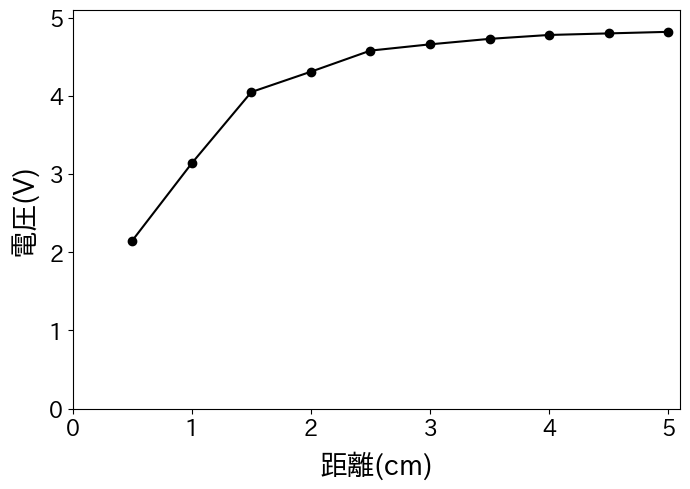

In [9]:
import matplotlib.pyplot as plt
import japanize_matplotlib
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'IPAexGothic'
plt.figure(figsize=(5, 5))
d = [0.50, 1.00, 1.50, 2.00, 2.50, 3.00, 3.50, 4.00, 4.50, 5.00]
v = [2.15, 3.14, 4.05, 4.31, 4.58, 4.66, 4.73, 4.78, 4.80, 4.82]

plt.figure(figsize=(7,5))
plt.plot(d,v, color="black", linestyle="-",marker="o", markersize=6,label="") 
plt.xlim(0,5.1)
plt.ylim(0,5.1)
plt.xlabel("距離(cm)",fontsize=20,labelpad=8)
plt.ylabel("電圧(V)",fontsize=20,labelpad=8)
plt.tick_params(labelsize=16)
plt.tight_layout()
plt.savefig("result_C1.png")
plt.show()

In [ ]:
!pip install japanize-matplotlib


  Using cached japanize_matplotlib-1.1.3-py3-none-any.whl


<Figure size 500x500 with 0 Axes>

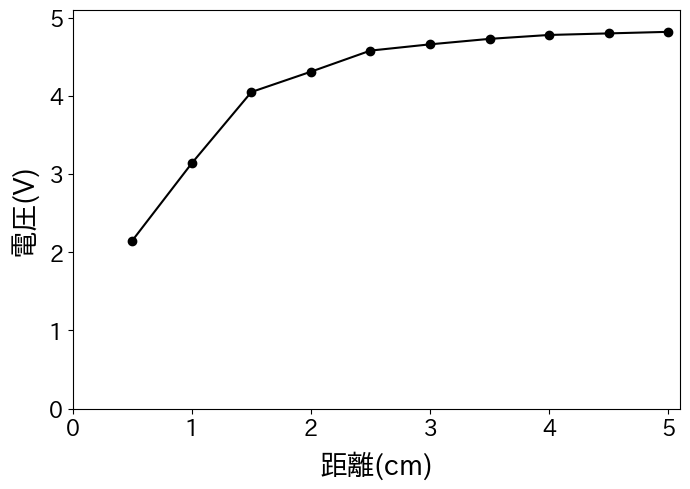

In [15]:
import matplotlib.pyplot as plt
import japanize_matplotlib
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'IPAexGothic'
plt.figure(figsize=(5, 5))
d = [0.50, 1.00, 1.50, 2.00, 2.50, 3.00, 3.50, 4.00, 4.50, 5.00]
v = [2.15, 3.14, 4.05, 4.31, 4.58, 4.66, 4.73, 4.78, 4.80, 4.82]

plt.figure(figsize=(7,5))
plt.plot(d,v, color="black", linestyle="-",marker="o", markersize=6,label="") 
plt.xlim(0,5.1)
plt.ylim(0,5.1)
plt.xlabel("距離(cm)",fontsize=20,labelpad=8)
plt.ylabel("電圧(V)",fontsize=20,labelpad=8)
plt.tick_params(labelsize=16)
plt.tight_layout()
plt.savefig("result_C1.png")
plt.show()

In [4]:
import pandas as pd   # ← pandasをインポート
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib  # 日本語フォント対応

data=pd.read_csv("result_C2.csv",  parse_dates=True)
t=np.arange(len(y))
y=df.values.ravel()

plt.figure(figsize=(7,4))
plt.plot(t, y, color="black", linestyle="-", marker="o", markersize=6)
plt.ylim(2.0,4.5)
plt.xlim(0,100)
plt.xlabel("時間 (s)", fontsize=20, labelpad=8)
plt.ylabel("電圧 (V)", fontsize=20, labelpad=8)
plt.tick_params(labelsize=16)

plt.tight_layout()
plt.savefig("result_C2.png")



ModuleNotFoundError: No module named 'japanize_matplotlib'

In [37]:
import matplotlib.pyplot as plt
import japanize_matplotlib
plt.figure(figsize=(5, 5))
d = [0.50, 1.00, 1.50, 2.00, 2.50, 3.00, 3.50, 4.00, 4.50, 5.00]
v = [2, 3, 3, 4, 4, 3, 5, 6, 5, 8]
# 右のグラフのような見栄えになるようにコードを追記
plt.tight_layout()
plt.savefig("result_C1.png")
plt.show()

<Figure size 500x500 with 0 Axes>

In [33]:
df = pd.DataFrame({'voltage': np.array(queue)})
df.to_csv("result_C2.csv", index=False)

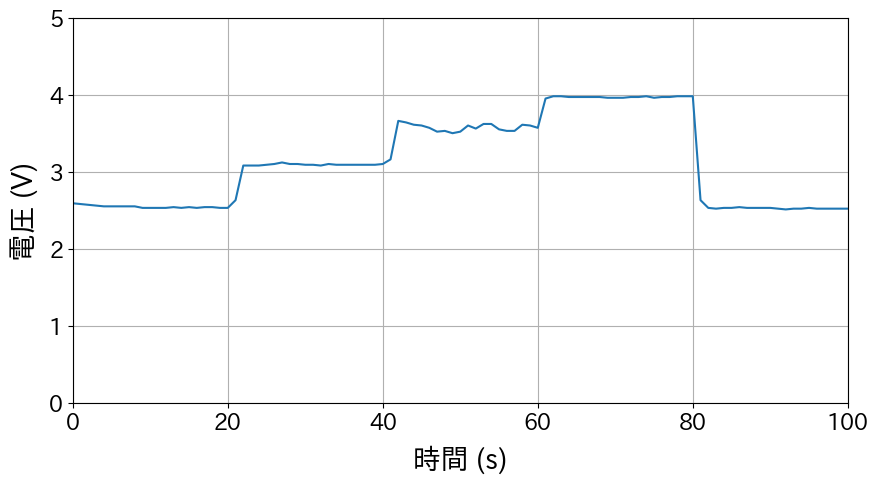

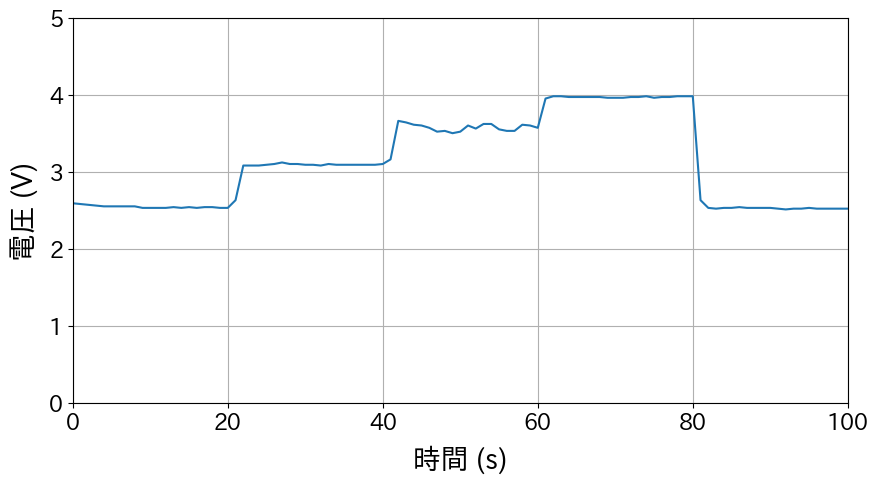

In [ ]:
import requests
from collections import deque
import time
import threading
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output, display

# ---- 設定 ----
student_id = 112  # ← 学籍番号の下3桁に変更（例: 112）
url = f"http://192.168.{student_id}.2"
num = 101  # グラフ上の点の数

# ---- 初期化 ----
queue = deque([0] * num)
plt.figure(figsize=(10, 5))

# ---- データ取得（Arduino から電圧値を取得）----
def worker():
    try:
        r = requests.get(url, timeout=2)
        r.raise_for_status()
        val = r.json().get("value", 0)
    except Exception:
        val = np.nan  # 通信失敗時はNaN
    queue.popleft()
    queue.append(val)

# ---- 一定間隔で実行 + グラフ描画 ----
def scheduler(interval, f, wait=True):
    base_time = time.perf_counter()
    threads = []
    for i in range(num):
        t = threading.Thread(target=f)
        threads.append(t)
        t.start()

        if wait:
            t.join()

        next_time = (base_time + (i + 1) * interval) - time.perf_counter()
        if next_time > 0:
            time.sleep(next_time)

        # --- グラフ更新 ---
        clear_output(wait=True)
        plt.cla()
        plt.plot(list(queue))
        plt.grid()
        plt.xlim(0, 100)
        plt.ylim(0, 5)
        plt.xlabel("時間 (s)", fontsize=20, labelpad=8)
        plt.ylabel("電圧 (V)", fontsize=20, labelpad=8)
        plt.tick_params(labelsize=16)
        display(plt.gcf())

    for t in threads:
        t.join()＿＿

# ---- 1秒ごとにデータ取得開始 ----
scheduler(1, worker, wait=False)

In [18]:
student_id = 112 # 学生番号の下3桁
url = f"http://192.168.{student_id}.2"
response = requests.get(url)
# ステータスコードの表示
print("Status Code:", response.status_code)

# レスポンスヘッダの表示
print("Headers:", response.headers)

# 生データの表示
print("Raw Data:", response.text)

# 取得された値の表示
print("Value:", response.json()["value"])

Status Code: 200
Headers: {'Content-type': 'application/json'}
Raw Data: {"value": 159.00}

Value: 159.0


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import pandas as pd
import time
import threading
from collections import deque
from IPython.display import display, clear_output
import requests

In [ ]:
# !pip install numpy matplotlib pandas requests japanize-matplotlib  setuptools

  Using cached requests-2.32.5-py3-none-any.whl.metadata (4.9 kB)
  Using cached japanize_matplotlib-1.1.3-py3-none-any.whl
  Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.6 kB)
  Using cached contourpy-1.3.3-cp312-cp312-macosx_11_0_arm64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.9-cp312-cp312-macosx_11_0_arm64.whl.metadata (6.3 kB)
  Using cached pillow-11.3.0-cp312-cp312-macosx_11_0_arm64.whl.metadata (9.0 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached charset_normalizer-3.4.3-cp312-cp312-macosx_10_13_universal2.whl.metadata (36 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached urllib3-2.5.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached certifi-2025.8.3-py3-none-any.whl.metadata (2.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 24.1 MB/s  0:00:00 et

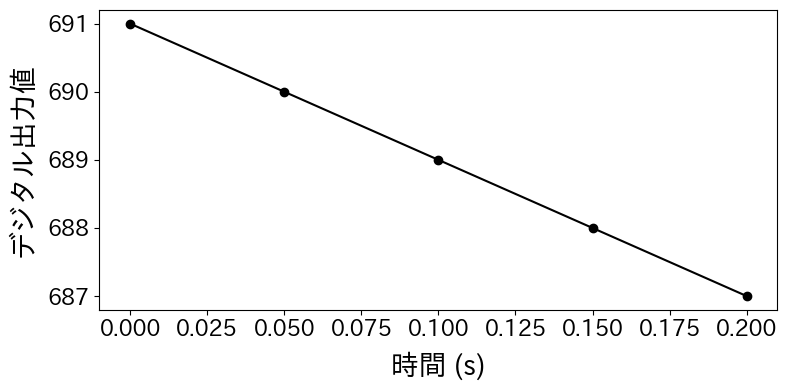

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import pandas as pd
fig = plt.figure(figsize=(8, 4))
ax = fig.subplots()
data = pd.read_csv("result.csv")
t = data['time'].values
v = data['value'].values
ax.plot(t, v, 'ko-', markersize=6)
ax.set_xlabel("時間 (s)", fontsize=20, labelpad=8)
ax.set_ylabel("デジタル出力値", fontsize=20, labelpad=8)
ax.tick_params(labelsize=16)
plt.tight_layout()
plt.savefig("result.png")
plt.show()

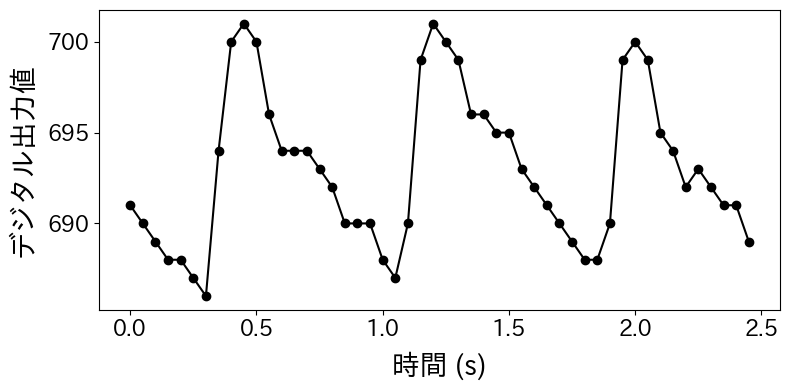

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import pandas as pd

fig = plt.figure(figsize=(8, 4))
ax = fig.subplots()

data = pd.read_csv("tutorial_data.csv")

t = data['time'].values
v = data['value'].values

ax.plot(t, v, 'ko-', markersize=6)
ax.set_xlabel("時間 (s)", fontsize=20, labelpad=8)
ax.set_ylabel("デジタル出力値", fontsize=20, labelpad=8)
ax.tick_params(labelsize=16)

plt.tight_layout()
# plt.savefig("result_tutorial.pdf")
# plt.savefig("result_tutorial.png")
plt.show()